# A quickstart for LMR Turbo (LMRt)

In this quickstart, we will demostrate how to use LMR Turbo (LMRt) to perform LMR analysis.
First, let's import the packages, among which `LMRt` is the LMR Turbo module, and `visual` is the visualizaion module for results plotting.

In [1]:
%load_ext autoreload
%autoreload 2

import LMRt
from LMRt import visual as vs

from pprint import pprint
import os
import numpy as np
import pandas as pd
import pickle
import time

## Initiate a reconstuction job

In [2]:
job = LMRt.ReconJob()

pid=19527 >>> job.cfg created


The job.cfg contains the default settings of the job, and we can print it out to have a check

In [3]:
# pprint(job.cfg, depth=3)

We may also overwrite the default configurations with a yaml file

In [9]:
!pwd
job.load_cfg('../LMRt/cfg/cfg_template.yml')
# pprint(job.cfg, depth=3)

/home/fzhu/Apps/LMRt/notebooks
pid=19527 >>> job.cfg updated


Or we may just use dot notation to update the specific configurations.
This way is much cleaner as every setting is explicitly listed in this Jupyter notebook.
Therefore, we recommend the users to follow this way.

In [10]:
# let's update the number of ensemble members
job.cfg.core.nens = 100
# pprint(job.cfg, depth=3)

That's it for configuration.
Let's move on to loading prior.

## Load prior

It is easy to load prior in LMRt.
We don't have to maintain a certain directory structure nor certain filenames.
Instead, we just feed the correct file, whereever it is.

In [12]:
filepath='/home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc'
job.load_prior(filepath, 'CMIP5', verbose=True, seed=0)

Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...
tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
State vector information:
{'tas_sfc_Amon': {'pos': (0, 13823), 'spacecoords': ('lat', 'lon'), 'spacedims': (96, 144), 'vartype': '2D:horizontal'}}
shape of Xb: (13824 x 100)
seed= 0
sampled inds= [864, 394, 776, 911, 430, 41, 265, 988, 523, 497, 414, 940, 802, 849, 310, 488, 366, 597, 913, 929, 223, 516, 142, 288, 143, 773, 97, 633, 818, 256, 931, 545, 722, 829, 616, 923, 150, 317, 101, 747, 75, 920, 870, 700, 338, 483, 573, 103, 362, 444, 323, 625, 655, 934, 209, 565, 984, 453, 886, 533, 266, 63, 824, 5

Now the object `job.prior` is created, and we can check prior values by `pprint` the `job.prior.prior_dict`

In [13]:
# pprint(job.prior.prior_dict)

## Load proxies

Similarly, to load proxies, we need to feed the correct files by specifying their paths.

In [15]:
dirpath = '../LMRt/data'

db_proxies_filename = 'LMRdb_v1.0.0_Proxies.df.pckl'
db_metadata_filename = 'LMRdb_v1.0.0_Metadata.df.pckl'
linear_precalib_filename = 'PSMs_LMRdb_v1.0.0_seasonPSM_GISTEMP_ref1951-1980_cal1850-2015.pckl'
bilinear_precalib_filename = 'PSMs_LMRdb_v1.0.0_seasonPSM_GISTEMP_GPCC_ref1951-1980_cal1850-2015.pckl'

precalib_filesdict = {
    'linear': os.path.join(dirpath, linear_precalib_filename),
    'bilinear': os.path.join(dirpath, bilinear_precalib_filename),
}

job.load_proxies(
    os.path.join(dirpath, db_proxies_filename),
    os.path.join(dirpath, db_metadata_filename),
    precalib_filesdict=precalib_filesdict,
    seed=0, verbose=False, print_proxy_type_list=True,
)

print(len(job.proxy_manager.all_proxies))
print(len(job.proxy_manager.ind_assim))
print(len(job.proxy_manager.ind_eval))

pid=19527 >>> job.proxy_manager created

Proxy types
--------------
                                 Bivalve_d18O:    1
               Corals and Sclerosponges_Rates:    8
                Corals and Sclerosponges_SrCa:   25
                Corals and Sclerosponges_d18O:   60
                        Ice Cores_MeltFeature:    1
                               Ice Cores_d18O:   28
                                 Ice Cores_dD:    7
                              Lake Cores_Misc:    2
                             Lake Cores_Varve:    5
                       Tree Rings_WidthPages2:  343
                       Tree Rings_WoodDensity:   59
                                        TOTAL:  539
539
404
135


## Load Ye

Now let's load the pre-calculated Ye files

In [17]:
dirpath = '../LMRt/data'
linear_filename = 'icesm_last_millennium-tas_sfc_Amon-anom_linear_seasonPSM-GISTEMP_ref1951-1980_cal1850-2015_LMRdbv1.0.0.npz'
bilinear_filename = 'icesm_last_millennium-pr_sfc_Amon-tas_sfc_Amon-anom_bilinear_seasonPSM-T:GISTEMP-PR:GPCC_ref1951-1980_cal1850-2015_LMRdbv1.0.0.npz'

ye_filesdict = {
    'linear': os.path.join(dirpath, linear_filename),
    'bilinear': os.path.join(dirpath, bilinear_filename),
}

job.load_ye_files(ye_filesdict, verbose=True)

-------------------------------------------
Loading Ye files for proxy set: assim
-------------------------------------------
Loading precalculated Ye from:
 ../LMRt/data/icesm_last_millennium-pr_sfc_Amon-tas_sfc_Amon-anom_bilinear_seasonPSM-T:GISTEMP-PR:GPCC_ref1951-1980_cal1850-2015_LMRdbv1.0.0.npz

Loading precalculated Ye from:
 ../LMRt/data/icesm_last_millennium-tas_sfc_Amon-anom_linear_seasonPSM-GISTEMP_ref1951-1980_cal1850-2015_LMRdbv1.0.0.npz

Now extracting proxy type-dependent Ye values...

-------------------------------------------
Loading Ye files for proxy set: eval
-------------------------------------------
Loading precalculated Ye from:
 ../LMRt/data/icesm_last_millennium-pr_sfc_Amon-tas_sfc_Amon-anom_bilinear_seasonPSM-T:GISTEMP-PR:GPCC_ref1951-1980_cal1850-2015_LMRdbv1.0.0.npz

Loading precalculated Ye from:
 ../LMRt/data/icesm_last_millennium-tas_sfc_Amon-anom_linear_seasonPSM-GISTEMP_ref1951-1980_cal1850-2015_LMRdbv1.0.0.npz

Now extracting proxy type-dependent Ye 

## Perform the data assimilation procedure

Now it's time to perform the data assimilation procedure.

### Monte-Carlo iterations

To perform Monte-Carlo iterations, we need to repeat the workflow above with different randomization seeds.
Here we have the `job.run()` method to do it conveniently.
We can set the paramter `seed` to use different seeds.

In [19]:
# files to use
prior_filepath='/home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc'

dirpath = '../LMRt/data'

db_proxies_filename = 'LMRdb_v1.0.0_Proxies.df.pckl'
db_metadata_filename = 'LMRdb_v1.0.0_Metadata.df.pckl'
db_proxies_filepath = os.path.join(dirpath, db_proxies_filename)
db_metadata_filepath = os.path.join(dirpath, db_metadata_filename)

linear_precalib_filename = 'PSMs_LMRdb_v1.0.0_seasonPSM_GISTEMP_ref1951-1980_cal1850-2015.pckl'
bilinear_precalib_filename = 'PSMs_LMRdb_v1.0.0_seasonPSM_GISTEMP_GPCC_ref1951-1980_cal1850-2015.pckl'
precalib_filesdict = {
    'linear': os.path.join(dirpath, linear_precalib_filename),
    'bilinear': os.path.join(dirpath, bilinear_precalib_filename),
}

linear_filename = 'icesm_last_millennium-tas_sfc_Amon-anom_linear_seasonPSM-GISTEMP_ref1951-1980_cal1850-2015_LMRdbv1.0.0.npz'
bilinear_filename = 'icesm_last_millennium-pr_sfc_Amon-tas_sfc_Amon-anom_bilinear_seasonPSM-T:GISTEMP-PR:GPCC_ref1951-1980_cal1850-2015_LMRdbv1.0.0.npz'
ye_filesdict = {
    'linear': os.path.join(dirpath, linear_filename),
    'bilinear': os.path.join(dirpath, bilinear_filename),
}

In [20]:
print(job.cfg.core.recon_period)

(0, 2000)


In [21]:
%%time

seeds = np.arange(50)
print(f'Seeds={seeds}')

!mkdir results
save_dirpath = './results/jobs_serial'
# as an example, here we only run the first iteration
for seed in seeds[:1]:
    start = time.time()
    
    print(f'pid={os.getpid()} >>> seed={seed}')
    job = LMRt.ReconJob()
    job.run(prior_filepath, 'CMIP5', db_proxies_filepath, db_metadata_filepath,
            precalib_filesdict=precalib_filesdict, ye_filesdict=ye_filesdict,
            seed=seed, save_dirpath=save_dirpath, print_assim_proxy_count=True)
        
    end = time.time()
    time_used = (end-start)/60.0
    print(f'pid={os.getpid()} >>> Time used: {time_used} mins\n')

Seeds=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
pid=19527 >>> seed=0
pid=19527 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...
tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=19527 >>> job.prior created
pid=19527 >>> job.prior regridded
pid=19527 >>> job.proxy_manager created
                                 Bivalve_d18O:    1
               Corals and Sclerosponges_Rates:    7
                Corals and Sclerosponges_SrCa:   20
                Corals and Sclerospon

KF updating (pid=19527):   0%|          | 1/2001 [00:00<03:52,  8.59it/s]

pid=19527 >>> job.ye created

pid=19527 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=19527): 100%|██████████| 2001/2001 [14:03<00:00,  1.60it/s]



pid=19527 >>> job.res created

pid=19527 >>> Saving results to ./results/jobs_serial/job_r00.nc
-----------------------------------------------------

pid=19527 >>> Time used: 14.66554559469223 mins

CPU times: user 1h 23min 22s, sys: 1min 44s, total: 1h 25min 6s
Wall time: 14min 40s


### Result verification

To plot the results, just tell the function `vs.plot_gmt_ts_from_jobs` the path of the directory where we save the results.

['tas_sfc_Amon_gm_ens', 'tas_sfc_Amon_nhm_ens', 'tas_sfc_Amon_shm_ens']


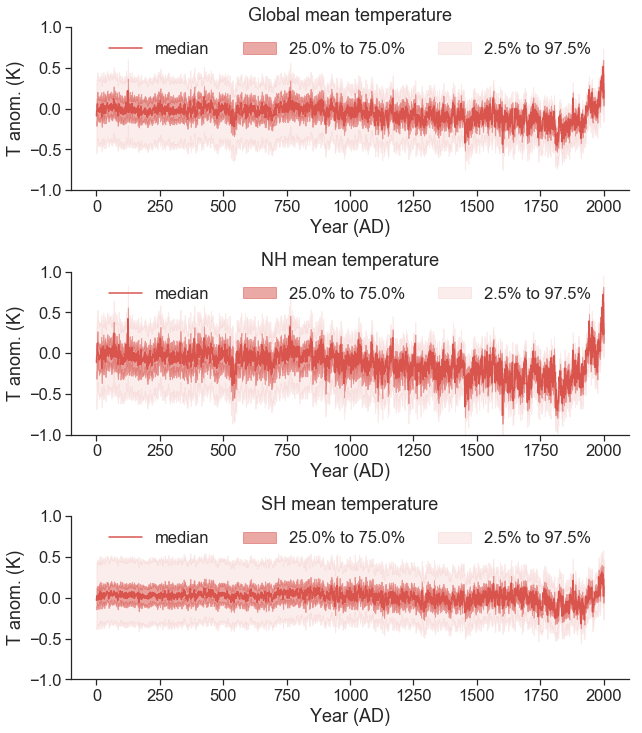

In [23]:
save_dirpath = './results/jobs_serial'
fig = vs.plot_ts_from_jobs(save_dirpath)

## Summary

LMRt aims to provide a packaged version of the LMR framework.
It is inspired by LMR_lite.py originated by Greg Hakim (Univ. of Washington).

Pros: less code; more flexibility
+ No need to specify fixed paths or directory structures; only need to feed the correct files
+ Interactive style (Jupyter notebook, ipython shell); keep a clean experiment record when use a Jupyter notebook
+ Output whatever you want from the object ReconJob()
+ Easy for parallel computing
+ For experiments such as pseudoproxy/PSM exps., only need to replace the files to feed (as long as the files follow the pre-defined format)

Cons: still in beta and active development, which means
+ the current interface could be changed in the future
+ the documentation/tutorial may not be updated